In [1]:
# Process all test images in order to find the a good color space and thresholds
import cv2
import glob
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Plot all graphical outputs inline
%matplotlib inline


test_image_files = glob.glob('./test_images/*')

test_images = []

for file in test_image_files:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_images.append(img)
    
    
print('Imgaes loaded')

Imgaes loaded


In [2]:
# Undistort the images
dist_pickle = pickle.load(open("./camera_cal/calibration_coefficients.p", "rb"))
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

undistorted_images = []

for img in test_images:
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    undistorted_images.append(undist)

    
print('Images undistorted')

Images undistorted


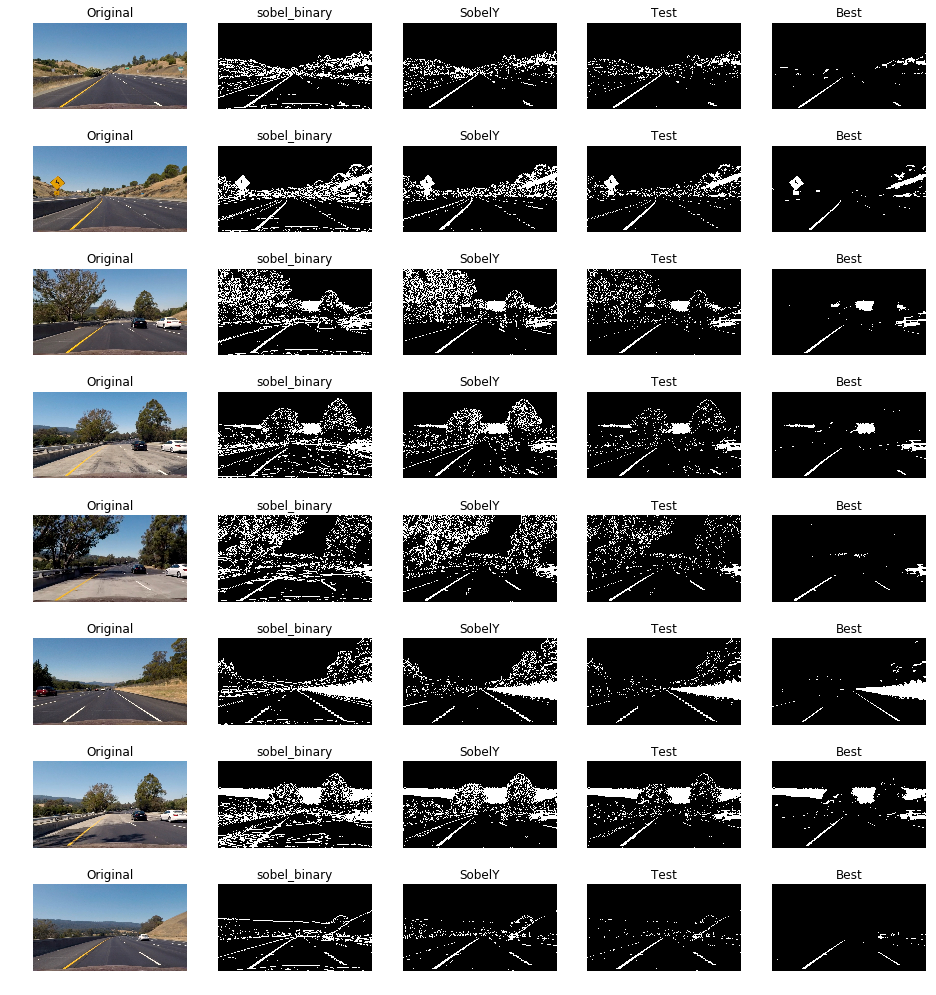

In [9]:
from Binarizer import Binarizer
binarizer = Binarizer()

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(20)

for index, img in enumerate(undistorted_images): 
    # Check various threshold values
    yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    Y = yuv[:, :, 0]
    U = yuv[:, :, 1]
    V = yuv[:, :, 2]

    Y_binary = np.zeros_like(Y)
    Y_binary[(Y >= 200) & (Y <= 255)] = 1

    U_binary = np.zeros_like(U)
    U_binary[(U >= 200) & (U <= 255)] = 1

    V_binary = np.zeros_like(V)
    V_binary[(V >= 0) & (V <= 100)] = 1
    
    
    sobelx = cv2.Sobel(Y, cv2.CV_64F, 1, 0, ksize=13)
    sobely = cv2.Sobel(Y, cv2.CV_64F, 0, 1, ksize=13)
    
    abs_sobel_x = np.absolute(sobelx)
    scaled_sobel_x = np.uint8(255 * abs_sobel_x / np.max(abs_sobel_x))

    sobel_binary = np.zeros_like(scaled_sobel_x)
    sobel_binary[(scaled_sobel_x >= 20) & (scaled_sobel_x <= 100)] = 1
    
    
    abs_sobel_y = np.absolute(sobely)
    scaled_sobel_y = np.uint8(255 * abs_sobel_y / np.max(abs_sobel_y))

    sobel_binary_y = np.zeros_like(scaled_sobel_y)
    sobel_binary_y[(scaled_sobel_y >= 20) & (scaled_sobel_y <= 100)] = 1
    
    test = np.zeros_like(Y)
    test[(sobel_binary_y == 1) & (sobel_binary == 1) | (Y_binary == 1) | (V_binary == 1)] = 1
    
    test2 = np.zeros_like(Y)
    test2[(sobel_binary_y == 1) | (Y_binary == 1) | (V_binary == 1)] = 1
    
    test3 = np.zeros_like(Y)
    test3[(sobel_binary == 1) | (Y_binary == 1) | (V_binary == 1)] = 1
    
    combined = np.zeros_like(Y)
    combined[(Y_binary == 1) | (V_binary == 1)] = 1
    
    
    
    plot_index = index * 5
    ax = fig.add_subplot(9, 5, plot_index + 1)
    ax.imshow(img)
    ax.axis('off')
    plt.title('Original')

    ax = fig.add_subplot(9, 5, plot_index + 2)
    ax.imshow(test2, cmap='gray')
    ax.axis('off')
    plt.title('sobel_binary')
    
    ax = fig.add_subplot(9, 5, plot_index + 3)
    ax.imshow(test3, cmap='gray')
    ax.axis('off')
    plt.title('SobelY')
    
    ax = fig.add_subplot(9, 5, plot_index + 4)
    ax.imshow(test, cmap='gray')
    ax.axis('off')
    plt.title('Test')
    
    ax = fig.add_subplot(9, 5, plot_index + 5)
    ax.imshow(combined, cmap='gray')
    ax.axis('off')
    plt.title('Best')
    

In [ ]:
# Check color spaces
for index, img in enumerate(undistorted_images):
    fig = plt.figure()
    fig.set_figwidth(16)
    fig.set_figheight(20)

    rgb = img
    gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
    hls = cv2.cvtColor(rgb, cv2.COLOR_RGB2HLS)
    hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
    YCrCb = cv2.cvtColor(rgb, cv2.COLOR_RGB2YCrCb)
    yuv = cv2.cvtColor(rgb, cv2.COLOR_RGB2YUV)

    # Print original and gray
    ax = fig.add_subplot(6, 3, 1)
    ax.imshow(rgb)
    plt.title('Original')

    ax = fig.add_subplot(6, 3, 2)
    ax.imshow(gray, cmap='gray')
    ax.axis('off')
    plt.title('Gray')

    # Print RGB
    ax = fig.add_subplot(6, 3, 4)
    ax.imshow(rgb[:,:,0], cmap='gray')
    ax.axis('off')
    plt.title('R')

    ax = fig.add_subplot(6, 3, 5)
    ax.imshow(rgb[:,:,1], cmap='gray')
    ax.axis('off')
    plt.title('G')

    ax = fig.add_subplot(6, 3, 6)
    ax.imshow(rgb[:,:,2], cmap='gray')
    ax.axis('off')
    plt.title('B')

    # Print HLS
    ax = fig.add_subplot(6, 3, 7)
    ax.imshow(hls[:,:,0], cmap='gray')
    ax.axis('off')
    plt.title('H')

    ax = fig.add_subplot(6, 3, 8)
    ax.imshow(hls[:,:,1], cmap='gray')
    ax.axis('off')
    plt.title('L')

    ax = fig.add_subplot(6, 3, 9)
    ax.imshow(hls[:,:,2], cmap='gray')
    ax.axis('off')
    plt.title('S')

    # Print HSV
    ax = fig.add_subplot(6, 3, 10)
    ax.imshow(hsv[:,:,0], cmap='gray')
    ax.axis('off')
    plt.title('H')

    ax = fig.add_subplot(6, 3, 11)
    ax.imshow(hsv[:,:,1], cmap='gray')
    ax.axis('off')
    plt.title('S')

    ax = fig.add_subplot(6, 3, 12)
    ax.imshow(hsv[:,:,2], cmap='gray')
    ax.axis('off')
    plt.title('V')

    # Print YCrCb
    ax = fig.add_subplot(6, 3, 13)
    ax.imshow(YCrCb[:,:,0], cmap='gray')
    ax.axis('off')
    plt.title('Y')

    ax = fig.add_subplot(6, 3, 14)
    ax.imshow(YCrCb[:,:,1], cmap='gray')
    ax.axis('off')
    plt.title('Cr')

    ax = fig.add_subplot(6, 3, 15)
    ax.imshow(YCrCb[:,:,2], cmap='gray')
    ax.axis('off')
    plt.title('Cb')

    # Print YUV
    ax = fig.add_subplot(6, 3, 16)
    ax.imshow(yuv[:,:,0], cmap='gray')
    ax.axis('off')
    plt.title('Y')

    ax = fig.add_subplot(6, 3, 17)
    ax.imshow(yuv[:,:,1], cmap='gray')
    ax.axis('off')
    plt.title('U')

    ax = fig.add_subplot(6, 3, 18)
    ax.imshow(yuv[:,:,2], cmap='gray')
    ax.axis('off')
    plt.title('V')
    

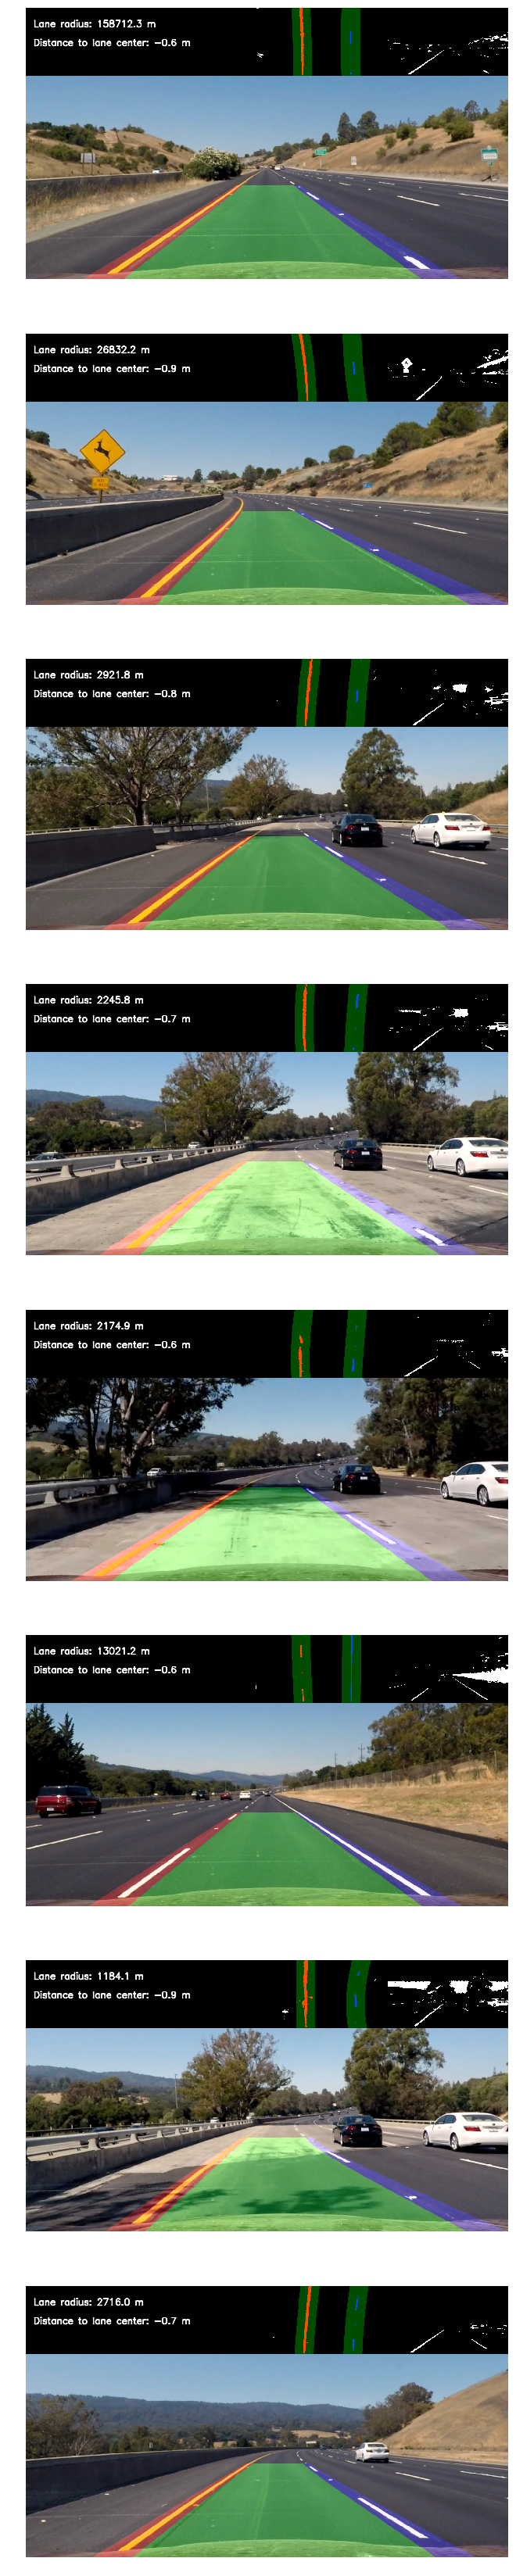

In [6]:
# Process pipeline
from Binarizer import Binarizer
from CameraCalibrator import CameraCalibrator
from Lane import Lane
from moviepy.editor import VideoFileClip
from optparse import OptionParser
from Visualizer import Visualizer
from Warper import Warper


# =============================================================================
# Create processing instances
# =============================================================================
calibrator = CameraCalibrator()
binarizer = Binarizer()
warper = Warper()
visualizer = Visualizer(warper)
lane = Lane(image_size=(720, 1280))

calibrator.loadParameters("./camera_cal/calibration_coefficients.p")


# =============================================================================
# Preprocessing pipeline
# =============================================================================
def process_image(image):
    """Process a single image"""
    undist = calibrator.undistort(image)
    binarized = binarizer.process(undist)
    warped = warper.warp(binarized)
    
    lane.reset()
    lane.detect_lane(warped)

    debug_image = lane.get_debug_image(warped)

    visualizer.draw_debugging_output(undist, binarized, warped, debug_image)
    visualizer.draw_text_info(undist, lane.center_curvature, lane.center_offset)
    result = visualizer.draw_lane_on_road(undist, lane)

    return result


#fig = plt.figure()
#fig.set_figwidth(16)
#fig.set_figheight(60)

#for index, image in enumerate(test_images):
#    result = process_image(image)
    
#    ax = fig.add_subplot(8, 1, index + 1)
#    ax.imshow(result)
#    ax.axis('off')

#for index, image in enumerate(test_images):
#    result = process_image(image)
    
#    fig = plt.figure()
#    fig.set_figwidth(16)
#    fig.set_figheight(10)

#    ax = fig.add_subplot(1, 1, 1)
#    ax.imshow(result)
#    fig.savefig(str(index)+'.png')

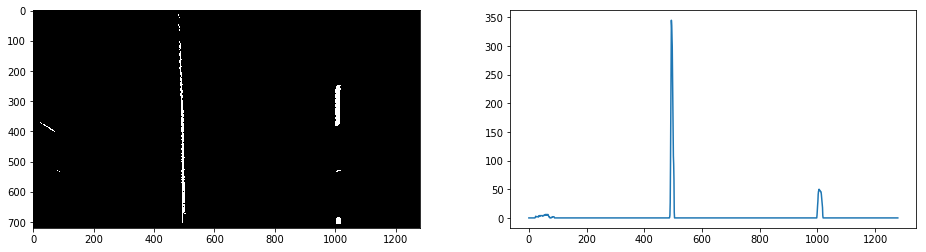

In [36]:
# Generate individual pipline stage images
from Binarizer import Binarizer
from CameraCalibrator import CameraCalibrator
from Lane import Lane
from moviepy.editor import VideoFileClip
from optparse import OptionParser
from Visualizer import Visualizer
from Warper import Warper


# =============================================================================
# Create processing instances
# =============================================================================
calibrator = CameraCalibrator()
binarizer = Binarizer()
warper = Warper()
visualizer = Visualizer(warper)
lane = Lane(image_size=(720, 1280))

calibrator.loadParameters("./camera_cal/calibration_coefficients.p")


image = cv2.imread('./test_images/straight_lines1.jpg')

undist = calibrator.undistort(image)
binarized = binarizer.process(undist)
warped = warper.warp(binarized)

lane.reset()
lane.detect_lane(warped)

debug_image = lane.get_debug_image(warped)

visualizer.draw_debugging_output(undist, binarized, warped, debug_image)
visualizer.draw_text_info(undist, lane.center_curvature, lane.center_offset)
result = visualizer.draw_lane_on_road(undist, lane)

output = warped

histogram = np.sum(warped[int(warped.shape[0] / 2):, :], axis=0)

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(4)
    
ax = fig.add_subplot(1, 2, 1)
ax.imshow(warped, cmap="gray")
#ax.axis('off')

ax = fig.add_subplot(1, 2, 2)
ax.plot(histogram)
#ax.imshow(histogram, cmap="gray")
#ax.axis('off')